In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\RBC\Downloads\Forbes+Billionaire+2020.csv")

In [3]:
df

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,49,Technology
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,65,Manufacturing
2752,Zhao Meiguang,1.0,China,gold mining,2674,58,Metals & Mining
2753,Zhong Naixiong,1.0,China,conglomerate,2674,58,Diversified


In [4]:
df.shape

(2755, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  2755 non-null   object 
 1   NetWorth in billions  2755 non-null   float64
 2   Country               2755 non-null   object 
 3   Source                2755 non-null   object 
 4   Rank                  2755 non-null   int64  
 5   Age                   2755 non-null   int64  
 6   Industry              2755 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 150.8+ KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NetWorth in billions,2755.0,4.749220,9.615358,1.0,1.5,2.3,4.2,177.0
Rank,2755.0,1345.663521,772.669811,1.0,680.0,1362.0,2035.0,2674.0
Age,2755.0,63.014519,13.259017,18.0,54.0,62.0,72.0,97.0


In [19]:
df.isnull().sum().sum()

0

<AxesSubplot:>

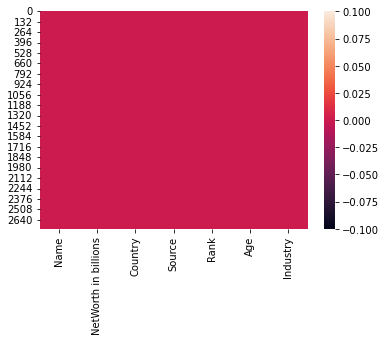

In [25]:
sns.heatmap(df.isnull())

In [26]:
#To check outilier

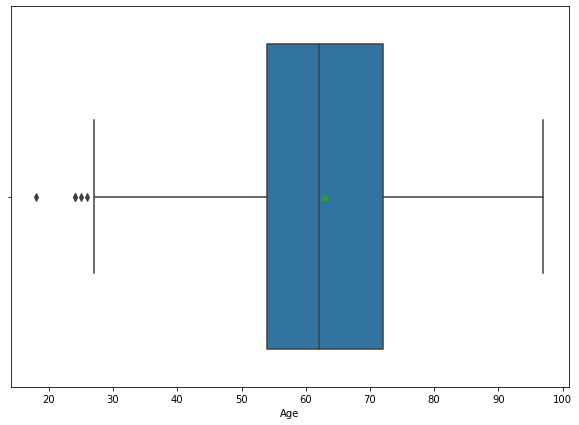

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Age",data=df,showmeans=True)
plt.show()

# summary of data

In [37]:
df.index

RangeIndex(start=0, stop=2755, step=1)

In [38]:
df.columns

Index(['Name', 'NetWorth in billions', 'Country', 'Source', 'Rank', 'Age',
       'Industry'],
      dtype='object')

In [41]:
df[["NetWorth in billions","Age"]].describe()

,NetWorth in billions,Age
count,2755.000000,2755.000000
mean,4.749220,63.014519
std,9.615358,13.259017
min,1.000000,18.000000
25%,1.500000,54.000000
50%,2.300000,62.000000
75%,4.200000,72.000000
max,177.000000,97.000000


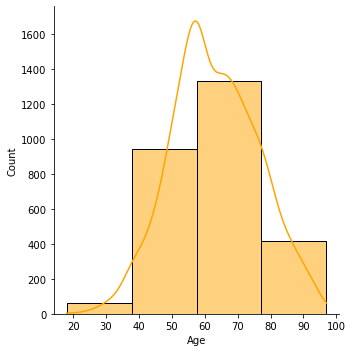

In [140]:
sns.displot(df["Age"],color="orange",kde=True,rug_kws={"color":"green"},bins=4)

# Top 5 country having maximum billionaire

In [74]:
df[["Country"]].value_counts().head(5)

Country      
United States    724
China            626
India            140
Germany          136
Russia           118
dtype: int64

# Which countries do the 5 youngest billionaires belong to?

In [71]:
df.sort_values(by="Age").head(5)

,Name,NetWorth in billions,Country,Source,Rank,Age,Industry
940,Kevin David Lehmann,3.3,Germany,drugstores,925,18,Fashion & Retail
2143,Alexandra Andresen,1.4,Norway,investments,2141,24,Diversified
2122,Wang Zelong,1.5,China,chemicals,2035,24,Metals & Mining
2144,Katharina Andresen,1.4,Norway,investments,2141,25,Diversified
1338,Austin Russell,2.4,United States,Unknown,1299,26,Automotive


In [141]:
df.sort_values(by = 'Age').head(5)['Country'].unique()

array(['Germany', 'Norway', 'China', 'United States'], dtype=object)

C:\Users\RBC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


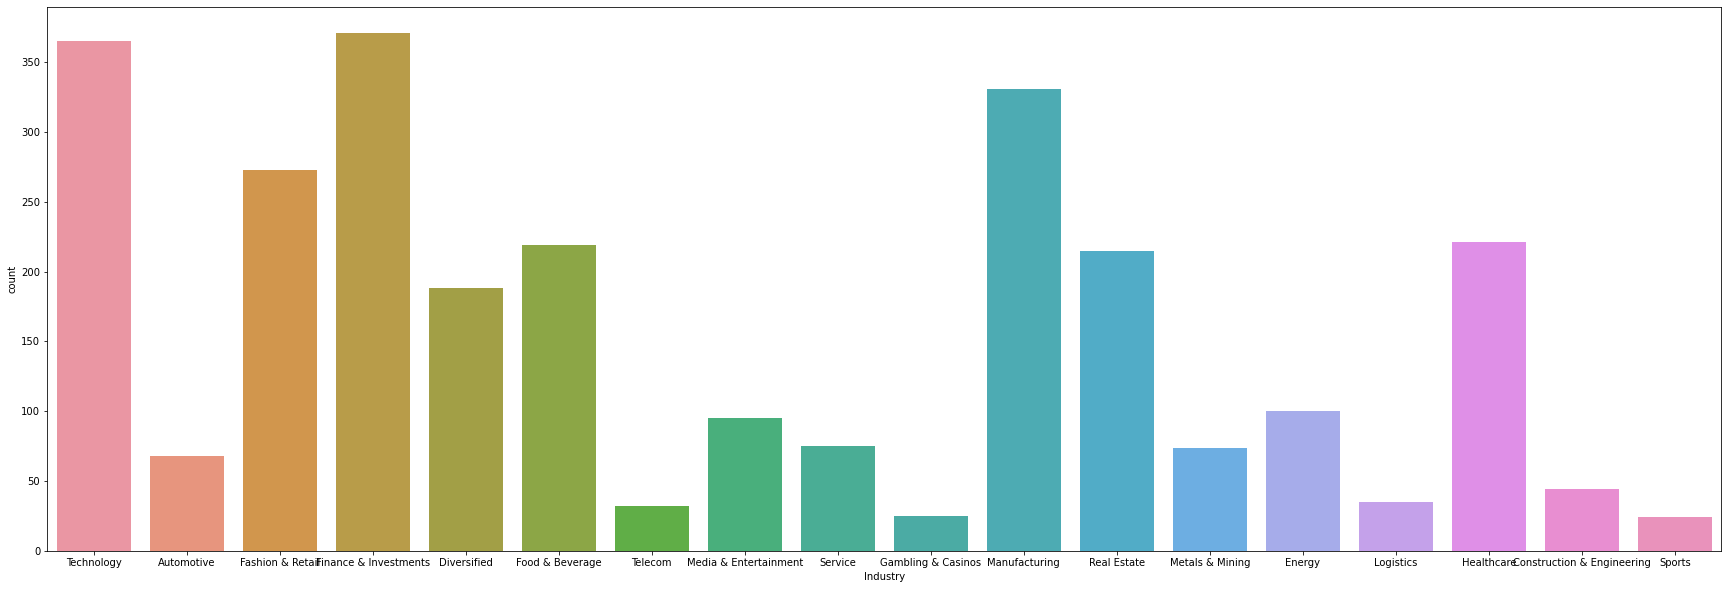

In [92]:
plt.figure(figsize=(30,10))
sns.countplot(df['Industry'],saturation=0.75)
plt.show()

In [93]:
#top 5 industries

In [94]:
df[["Industry"]].value_counts().head()

Industry             
Finance & Investments    371
Technology               365
Manufacturing            331
Fashion & Retail         273
Healthcare               221
dtype: int64

# Name all the billionaires in India who are younger than 50 years. 

In [117]:
bill_in=df[df["Country"]=="India"]

In [123]:
bill_in[bill_in["Age"]<50]["Name"]

1255    Byju Raveendran and Divya Gokulnath
1424                   Vijay Shekhar Sharma
1447                     Acharya Balkrishna
2118                            Radha Vembu
2334                             Ranjan Pai
2382                          Sachin Bansal
2528                           Binny Bansal
2642                            Sekar Vembu
Name: Name, dtype: object

In [124]:
#pi-chart()

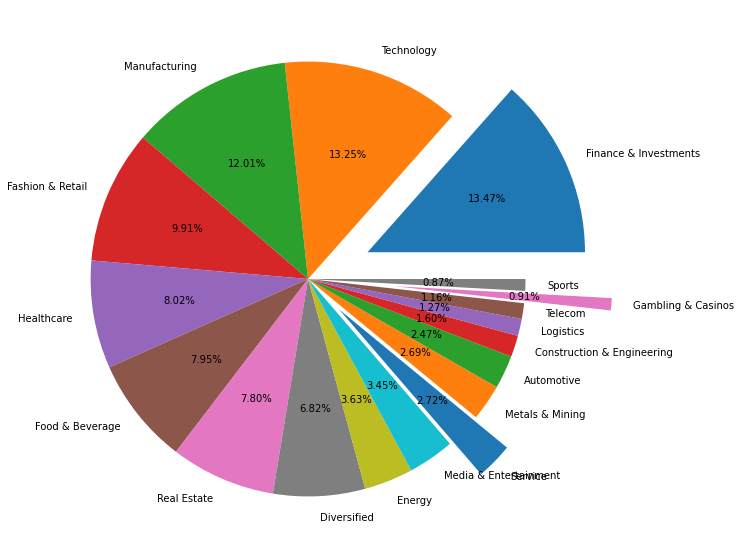

In [139]:
plt.figure(figsize=(11,10))
plt.pie(df["Industry"].value_counts(),labels=df["Industry"].value_counts().index,autopct="%.2f%%",
        explode = (0.3,0,0,0,0,0,0,0,0,0,0.2,0,0,0,0,0,0.4,0))
plt.show()

# To check age distribution by Industry

<AxesSubplot:xlabel='Age', ylabel='Industry'>

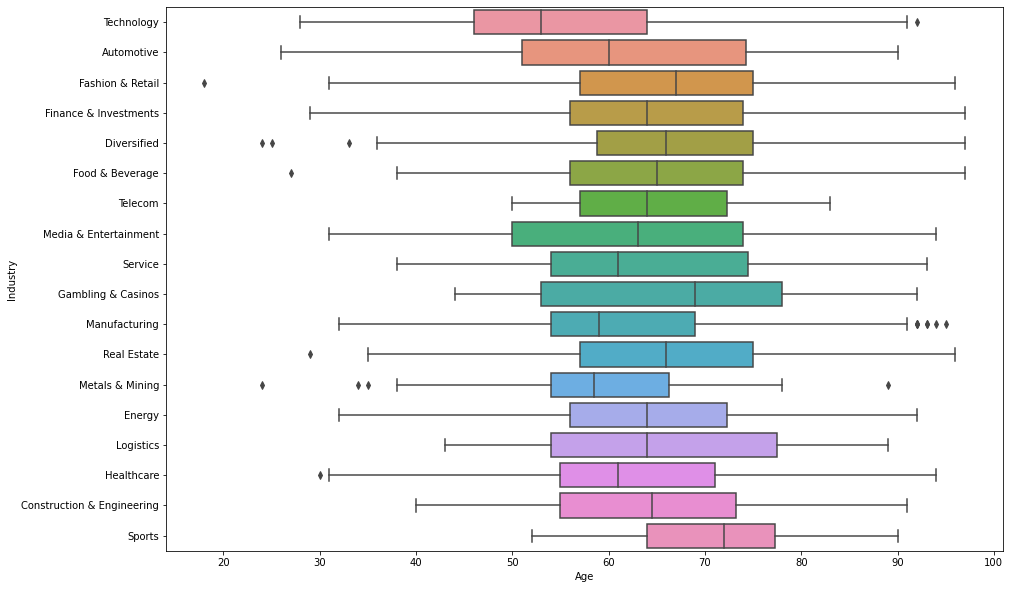

In [146]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Age",y="Industry",data=df)

# Plot a strip plot to check the relationship between the variables 'Industry' and 'Age'

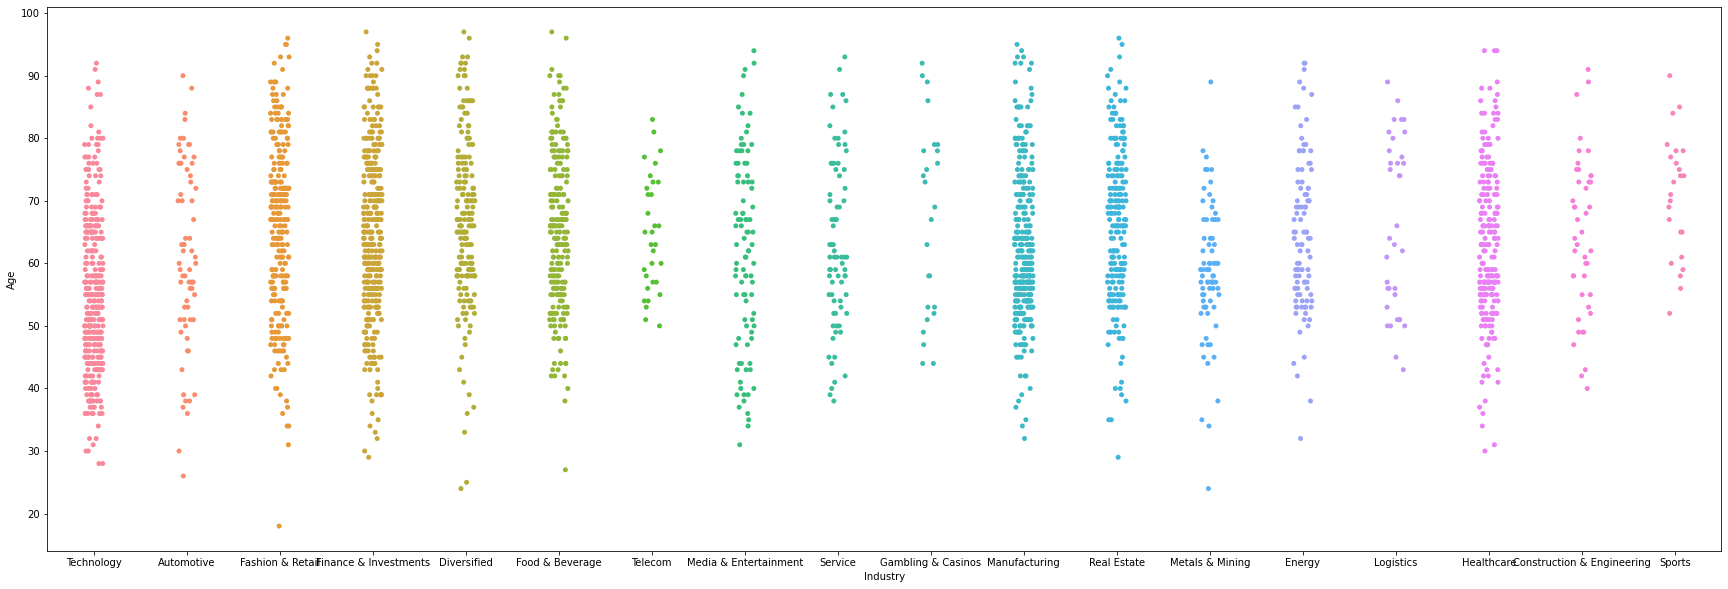

In [147]:
# strip plot
plt.figure(figsize=(30,10))
sns.stripplot(x = 'Industry', y = 'Age', data = df)

# display the plot
plt.show()

In [148]:
#scatter plot

<AxesSubplot:xlabel='Age', ylabel='Count'>

<Figure size 1080x720 with 0 Axes>

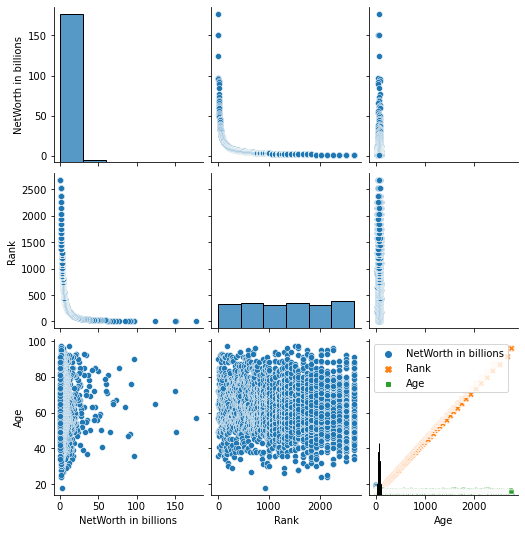

In [150]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df,diag_kws={'bins':6})
sns.scatterplot(data=df)

In [151]:
df.columns

Index(['Name', 'NetWorth in billions', 'Country', 'Source', 'Rank', 'Age',
       'Industry'],
      dtype='object')

In [153]:
corr_re=df.corr()

In [154]:
corr_re

,NetWorth in billions,Rank,Age
NetWorth in billions,1.000000,-0.475346,0.035225
Rank,-0.475346,1.000000,-0.104220
Age,0.035225,-0.104220,1.000000


<AxesSubplot:>

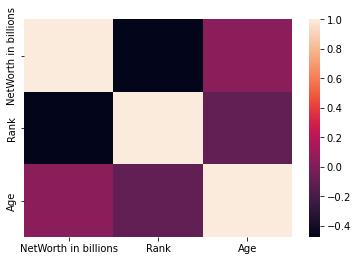

In [155]:
sns.heatmap(data=corr_re)